# Diwali Sales Aanalysis

#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

#### Loading the dataset and reviewing basic details

In [3]:
data=pd.read_csv('diwalisalesdata.csv',encoding='unicode_escape')

In [3]:
data.shape

(11251, 15)

In [4]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
data[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#### Data Cleaning
1- We used info method to find the overall information from data.With the help of info we can find in which column there is a mess.

2- We found that Status And Unnamed1 column are irrelevant/blank/null which are of no use for us. So we'll use remove them using 'drop function of Pandas'

3-Check for missing values and Handling missing values in the 'Amount' column by filling them with average of Amount column using mean.

4- Changing datatype of Amount column to int as dtype of this column is in float and we want it in int

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
data.drop(columns=['Status','unnamed1'],inplace=True)

In [5]:
missing_values=data.isnull().sum()
print(f"Missing Values:\n{missing_values}")

Missing Values:
User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


In [6]:
data['Amount'].fillna(data['Amount'].mean(),inplace=True)

In [7]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [8]:
data['Amount']=data['Amount'].astype('int')

### Customer Demographics Analysis

#### Q1: What is the gender distribution of customers?

In [37]:
gender_distribution=data['Gender'].value_counts()

print(f"Gender Distribution:\n{gender_distribution}")

Gender Distribution:
F    7842
M    3409
Name: Gender, dtype: int64


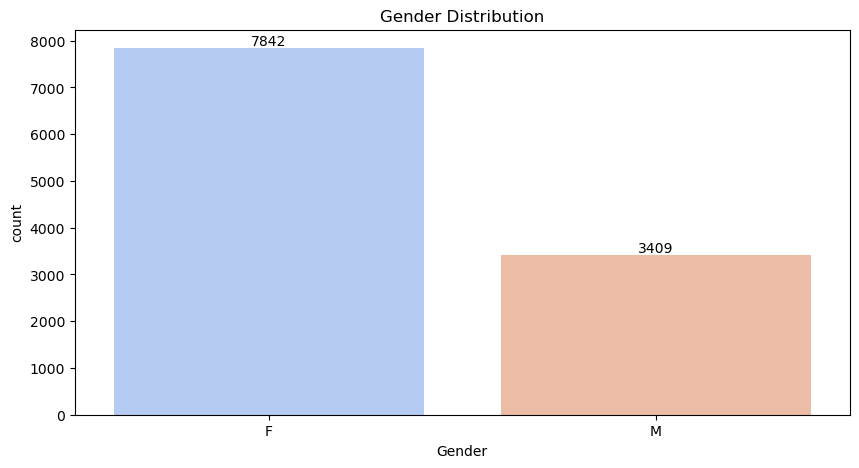

In [44]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data,x='Gender',palette='coolwarm')
plt.title("Gender Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

#### Q2: What are the age group distributions?

In [38]:
age_group_distribution=data['Age Group'].value_counts()

print(f"Age Group Distribution:\n{age_group_distribution}")

Age Group Distribution:
26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64


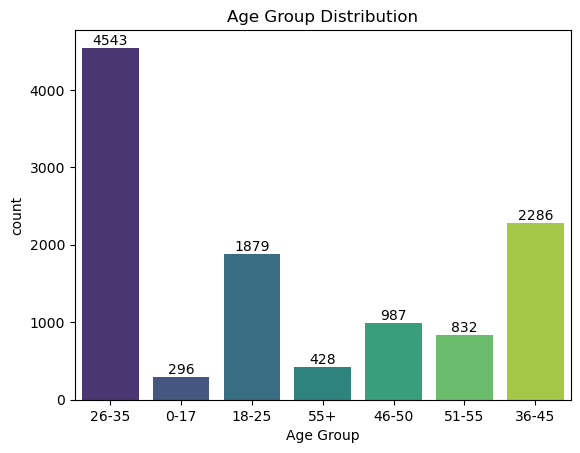

In [55]:
ax=sns.countplot(data=data,x='Age Group',palette='viridis')
plt.title("Age Group Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

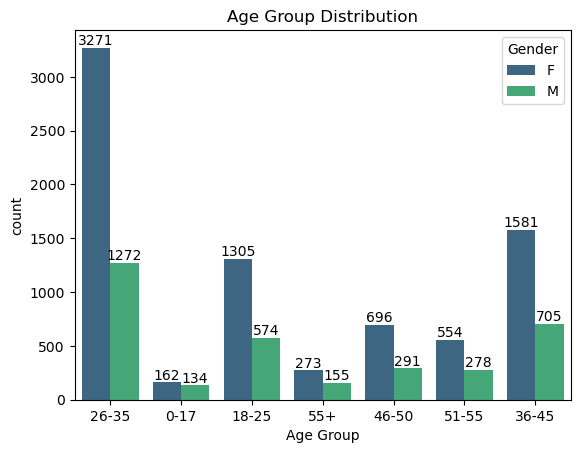

In [54]:
ax=sns.countplot(data=data,x='Age Group',palette='viridis',hue='Gender')
plt.title("Age Group Distribution")
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### Purchase Behavior Analysis

#### Q3: What is the total amount spent by different age groups?

In [59]:
total_amount_age_group=data.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(f"Total amount spent by Age Group:\n{total_amount_age_group}")

Total amount spent by Age Group:
  Age Group    Amount
2     26-35  42632348
3     36-45  22173353
1     18-25  17240732
4     46-50   9245656
5     51-55   8280383
6       55+   4090440
0      0-17   2699653


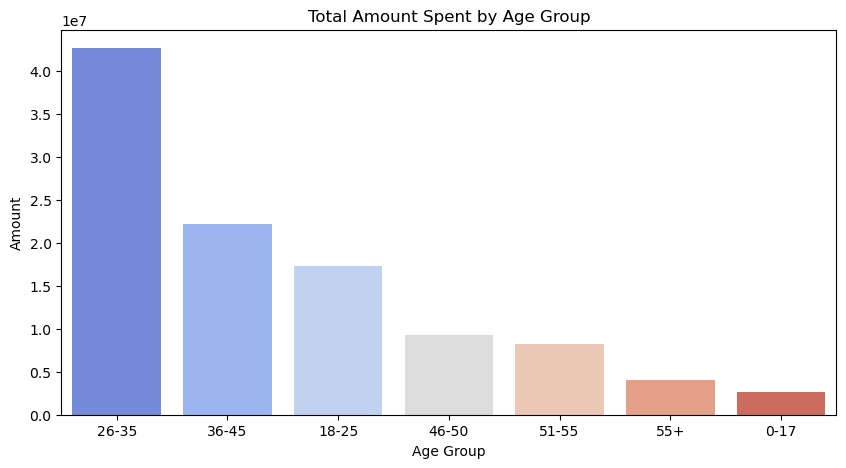

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(data=total_amount_age_group, x="Age Group", y="Amount", palette="coolwarm")
plt.title("Total Amount Spent by Age Group")
plt.show()


#### Q4: What is the average amount spent by different age groups?

In [98]:
avg_amount_age_group=data.groupby(['Age Group'],as_index=False)['Amount'].mean().sort_values(by='Amount',ascending=False)
print(f"Average amount spent by Age Group:\n{avg_amount_age_group}")

Average amount spent by Age Group:
  Age Group       Amount
5     51-55  9952.383413
3     36-45  9699.629484
6       55+  9557.102804
2     26-35  9384.184019
4     46-50  9367.432624
1     18-25  9175.482704
0      0-17  9120.449324


In [104]:
avg_amount_age_group = data.groupby("Age Group")["Amount"].mean()
print("Average amount spent by Age Group:\n", avg_amount_age_group)


Average amount spent by Age Group:
 Age Group
0-17     9120.449324
18-25    9175.482704
26-35    9384.184019
36-45    9699.629484
46-50    9367.432624
51-55    9952.383413
55+      9557.102804
Name: Amount, dtype: float64


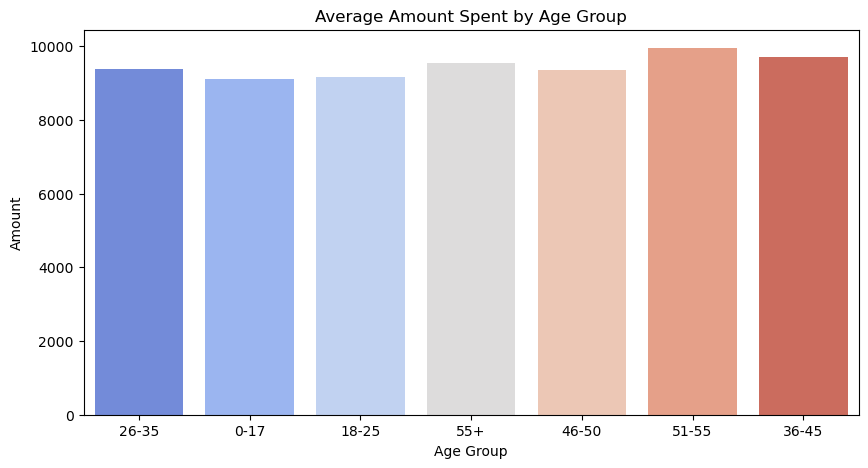

In [105]:
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="Age Group", y="Amount", palette="coolwarm", ci=None)
plt.title("Average Amount Spent by Age Group")
plt.show()

#### Q5: Which gender spends more?

In [123]:
total_amount_gender=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
print(f"Total amount spent by Gender:\n{total_amount_gender}")

Total amount spent by Gender:
  Gender    Amount
0      F  74430383
1      M  31932182


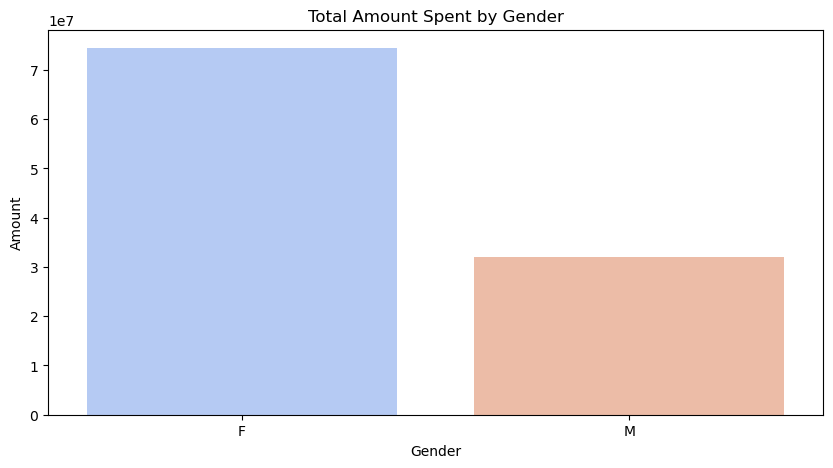

In [130]:
plt.figure(figsize=(10, 5))
sns.barplot(data=total_amount_gender, x="Gender", y="Amount", palette="coolwarm")
plt.title("Total Amount Spent by Gender")
plt.show()

#### Q6: Identify top 10 customers by spending/Top 10 High-Value Customers

In [202]:
customer_spending = data.groupby('User_ID')['Amount'].sum()

In [203]:
top_customers = customer_spending.sort_values(ascending=False).head(10)
print("Top 10 High-Value Customers:\n", top_customers)

Top 10 High-Value Customers:
 User_ID
1001680    281034
1001941    239147
1003476    220435
1002665    201104
1003808    197660
1004425    194343
1003618    189921
1000424    187679
1004682    185122
1001298    184045
Name: Amount, dtype: int32


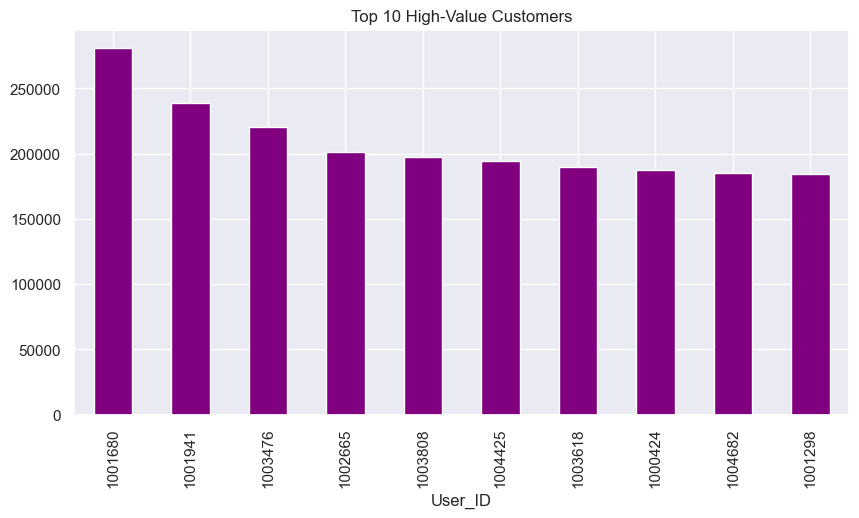

In [204]:
plt.figure(figsize=(10, 5))
top_customers.plot(kind="bar", color="purple")
plt.title("Top 10 High-Value Customers")
plt.show()

### Regional Analysis

#### Q6: Top 10 states that has the highest sales?

In [138]:
state_sales=data.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
print(f"State Sales:\n{state_sales}")

State Sales:
               State    Amount
14     Uttar Pradesh  19393874
10       Maharashtra  14436996
7          Karnataka  13532993
2              Delhi  11632177
9     Madhya Pradesh   8120048
0     Andhra Pradesh   8046599
5   Himachal Pradesh   4963368
4            Haryana   4220175
1              Bihar   4022757
3            Gujarat   3964988


Text(0.5, 1.0, 'State-wise-sales')

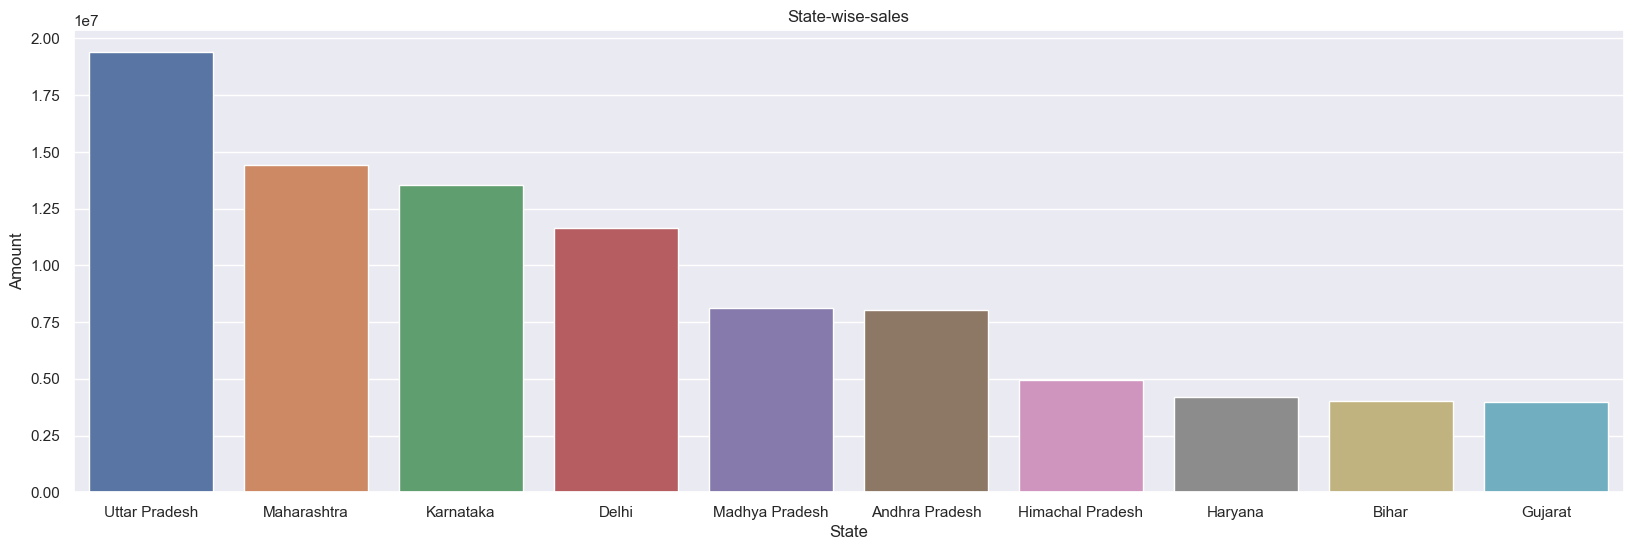

In [143]:
sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=state_sales,x='State',y='Amount')
plt.title('State-wise-sales')

#### Q7: Top 10 states that has the highest Orders?

In [145]:
state_sales=data.groupby('State')['Orders'].sum().sort_values(ascending=False)
print(f"State-wise-orders:\n{state_sales}")

State-wise-orders:
State
Uttar Pradesh       4813
Maharashtra         3811
Karnataka           3241
Delhi               2744
Madhya Pradesh      2259
Andhra Pradesh      2054
Himachal Pradesh    1568
Kerala              1137
Haryana             1109
Gujarat             1070
Bihar               1062
Jharkhand            953
Uttarakhand          824
Rajasthan            555
Punjab               495
Telangana            312
Name: Orders, dtype: int64


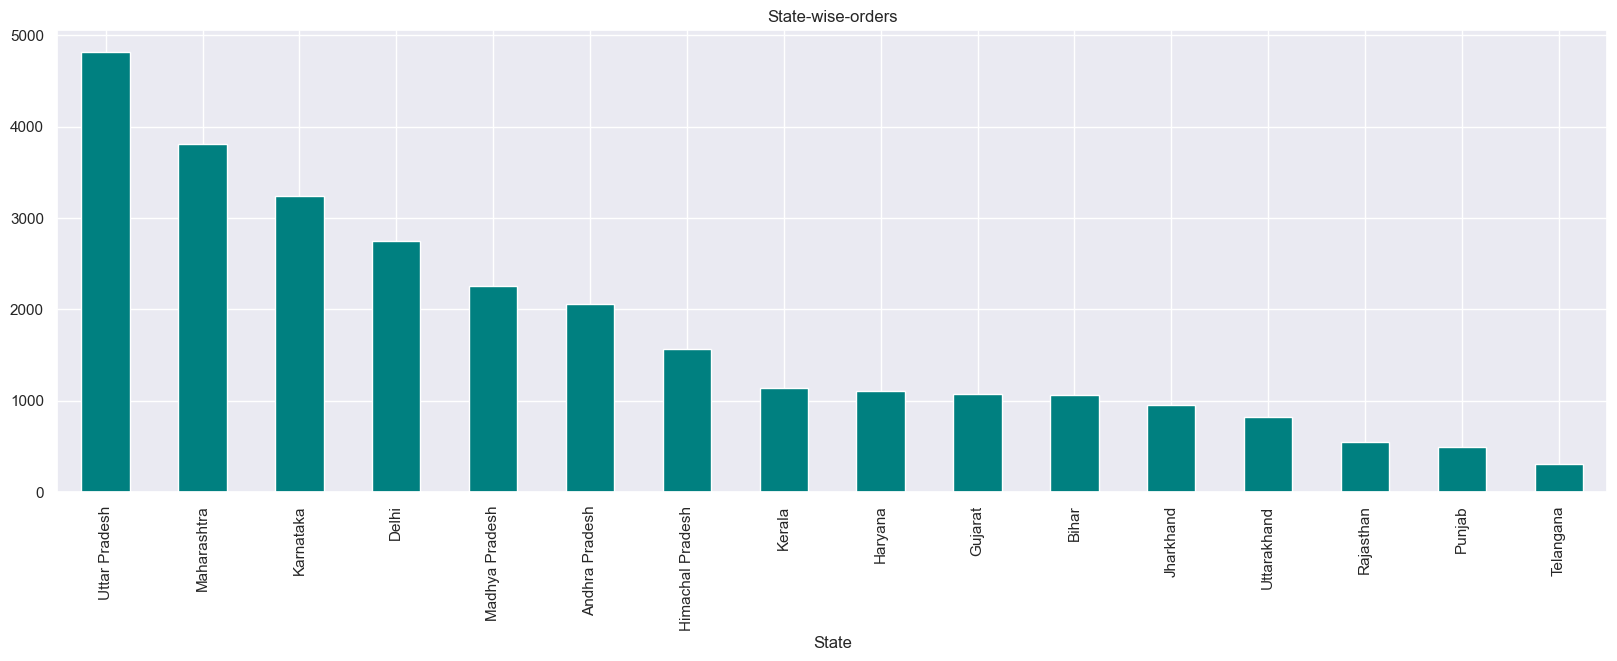

In [146]:
plt.figure(figsize=(20,6))
state_sales.plot(kind='bar',color='teal')
plt.title('State-wise-orders')
plt.show()

#### Q8: How do sales vary across zones?

In [147]:
zone_sales=data.groupby('Zone')['Amount'].sum()
print(f"Zone Sales:\n{zone_sales}")

Zone Sales:
Zone
Central     41667043
Eastern      7049213
Northern    12618752
Southern    26625573
Western     18401984
Name: Amount, dtype: int32


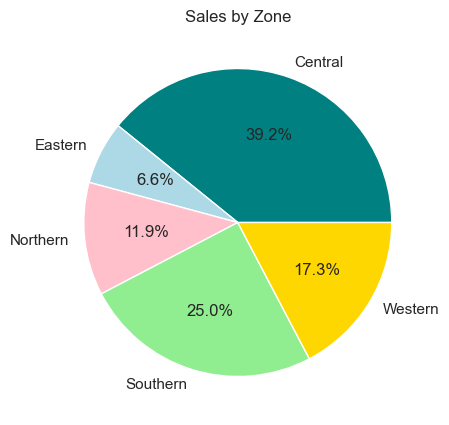

In [156]:
plt.figure(figsize=(8,5))
zone_sales.plot(kind='pie',autopct='%1.1f%%',colors=['teal','lightblue','pink','lightgreen','gold'])
plt.title('Sales by Zone')
plt.ylabel("")
plt.show()

### Product Analysis

#### Q9: What are the top 5 selling product categories?

In [157]:
top_categories=data['Product_Category'].value_counts().head()
print(f"Top 5 selling Product Categories:\n{top_categories}")

Top 5 selling Product Categories:
Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Name: Product_Category, dtype: int64


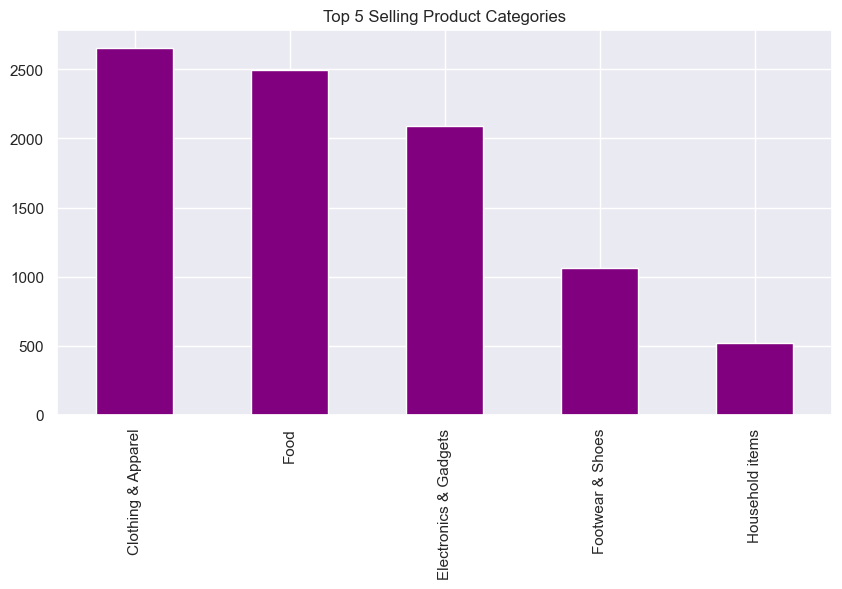

In [158]:
plt.figure(figsize=(10,5))
top_categories.plot(kind='bar',color='purple')
plt.title("Top 5 Selling Product Categories")
plt.show()

#### Q10: Which product category generates the most revenue?

In [159]:
revenue_categories=data.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).head()
print(f"Top 5 Revenue Generating Categories:\n{revenue_categories}")

Top 5 Revenue Generating Categories:
Product_Category
Food                     33962242
Clothing & Apparel       16495019
Electronics & Gadgets    15643846
Footwear & Shoes         15622474
Furniture                 5449504
Name: Amount, dtype: int32


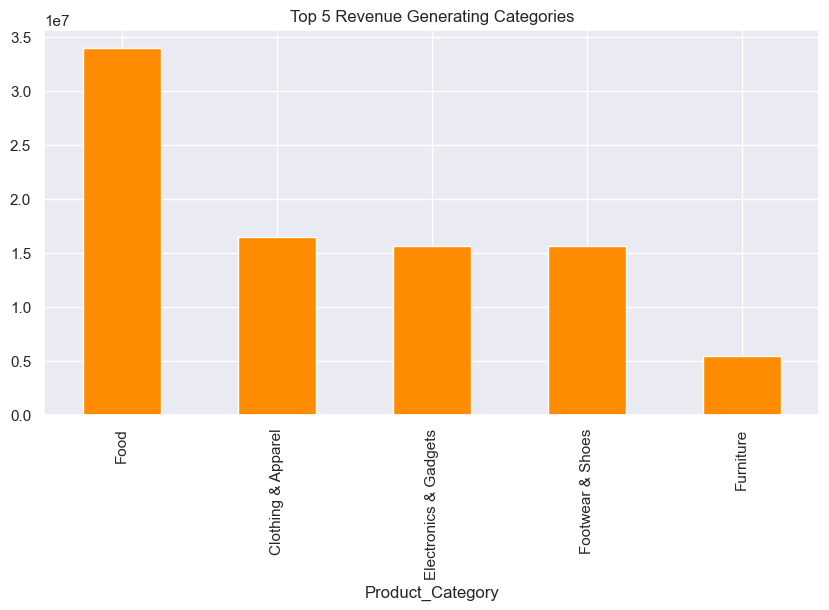

In [160]:
plt.figure(figsize=(10,5))
revenue_categories.plot(kind='bar',color='darkorange')
plt.title("Top 5 Revenue Generating Categories")
plt.show()

In [ ]:
# #From above graph we can see that food, clothing & Apparel and electronics footwear&Shoes and Furniture category generates the most revenue.

#### Q11: What are the top 10 selling products?

In [198]:
revenue_products=data.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
print(f"Top 10 selling products:\n{revenue_products}")

Top 10 selling products:
     Product_ID  Orders
1680  P00265242     127
645   P00110942     116
1505  P00237542      91
1147  P00184942      82
680   P00114942      79
172   P00025442      79
889   P00145042      76
709   P00117942      76
299   P00044442      75
644   P00110842      74


<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

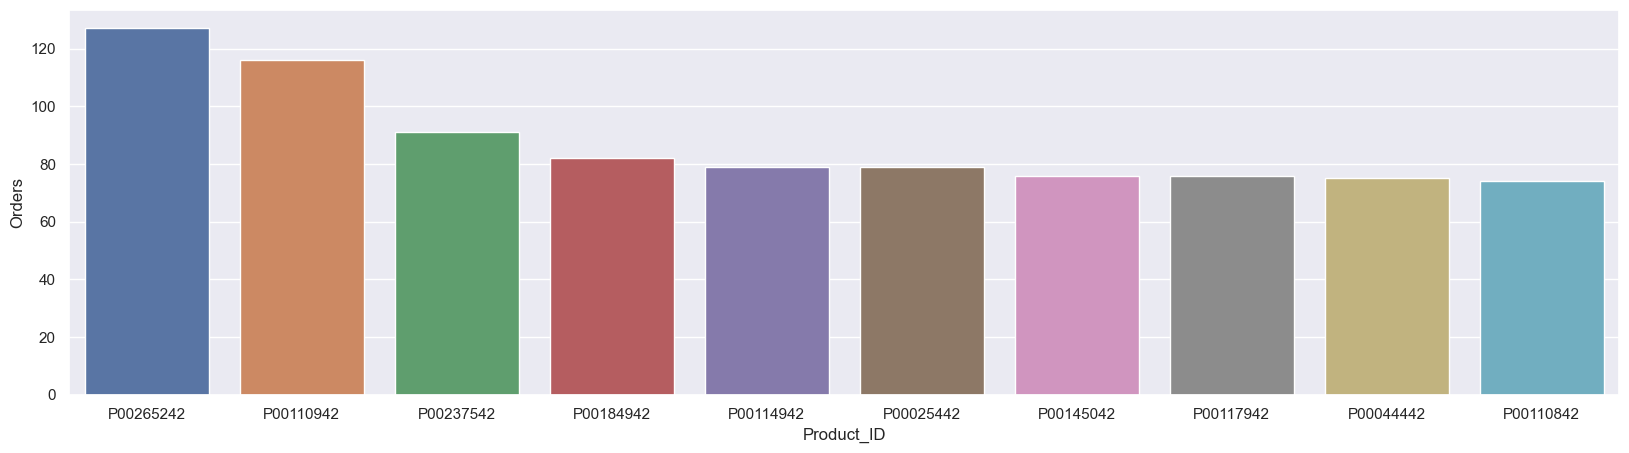

In [199]:
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=revenue_products,x='Product_ID',y='Orders')

### Customer Engagement

#### Q12: How does marital status affect purchasing behavior?

In [161]:
marital_status_sales=data.groupby('Marital_Status')['Amount'].mean()
print(f"Marital Sttaus Analysis:\n{marital_status_sales}")

Marital Sttaus Analysis:
Marital_Status
0    9531.308801
1    9346.451470
Name: Amount, dtype: float64


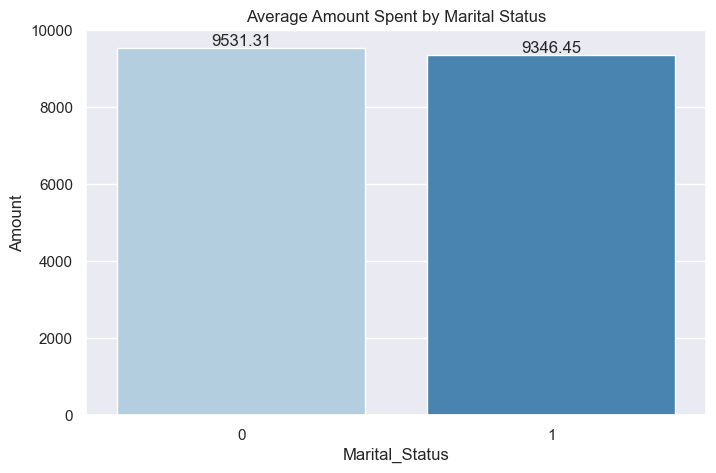

In [169]:
plt.figure(figsize=(8,5))
ax=sns.barplot(data=data,x='Marital_Status',y='Amount',palette='Blues',ci=None)
plt.title('Average Amount Spent by Marital Status')
for bars in (ax.containers):
    ax.bar_label(bars)
plt.show()

#### Q13: Which occupation has the highest sales?

In [170]:
occupation_sales=data.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
print(f"Sales by Occupation:\n{occupation_sales}")

Sales by Occupation:
Occupation
IT Sector          14802344
Healthcare         13034586
Aviation           12602298
Banking            10789516
Govt                8517212
Hospitality         6395311
Media               6295832
Automobile          5378049
Chemical            5306889
Lawyer              4981665
Retail              4783170
Food Processing     4070670
Construction        3597511
Textile             3214425
Agriculture         2593087
Name: Amount, dtype: int32


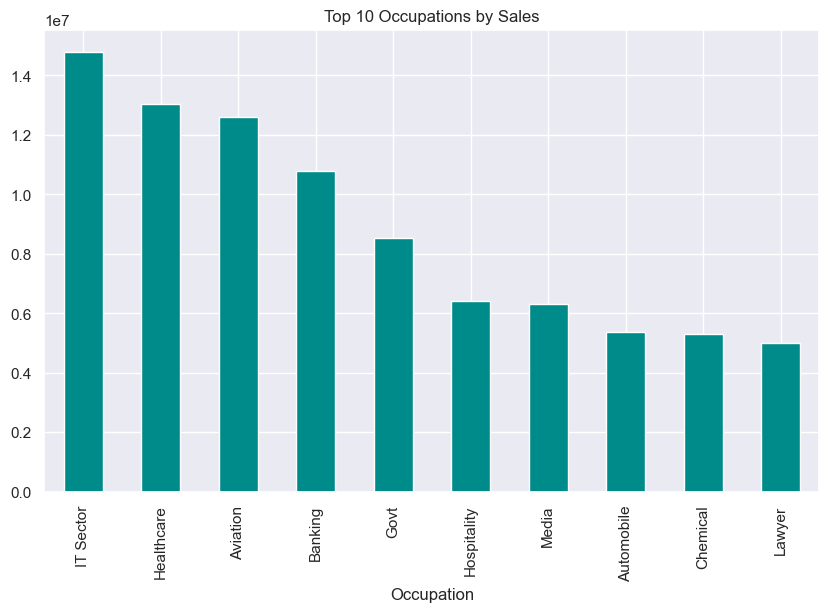

In [174]:
plt.figure(figsize=(10,6))
occupation_sales.head(10).plot(kind='bar',color='darkcyan')
plt.title("Top 10 Occupations by Sales")
plt.show()

### Seasonal Trends

#### Q14: Are there any seasonal trends in sales based on this Diwali data?

In [176]:
sales_trends=data.groupby(['State','Zone'])['Amount'].sum().unstack().fillna(0)
print(f"Sales Trends by Zone:\n{sales_trends}")

Sales Trends by Zone:
Zone                 Central    Eastern   Northern    Southern     Western
State                                                                     
Andhra Pradesh           0.0        0.0        0.0   8046599.0         0.0
Bihar                    0.0  4022757.0        0.0         0.0         0.0
Delhi             11632177.0        0.0        0.0         0.0         0.0
Gujarat                  0.0        0.0        0.0         0.0   3964988.0
Haryana                  0.0        0.0  4220175.0         0.0         0.0
Himachal Pradesh         0.0        0.0  4963368.0         0.0         0.0
Jharkhand                0.0  3026456.0        0.0         0.0         0.0
Karnataka                0.0        0.0        0.0  13532993.0         0.0
Kerala                   0.0        0.0        0.0   3894491.0         0.0
Madhya Pradesh     8120048.0        0.0        0.0         0.0         0.0
Maharashtra              0.0        0.0        0.0         0.0  14436996.0
Pun

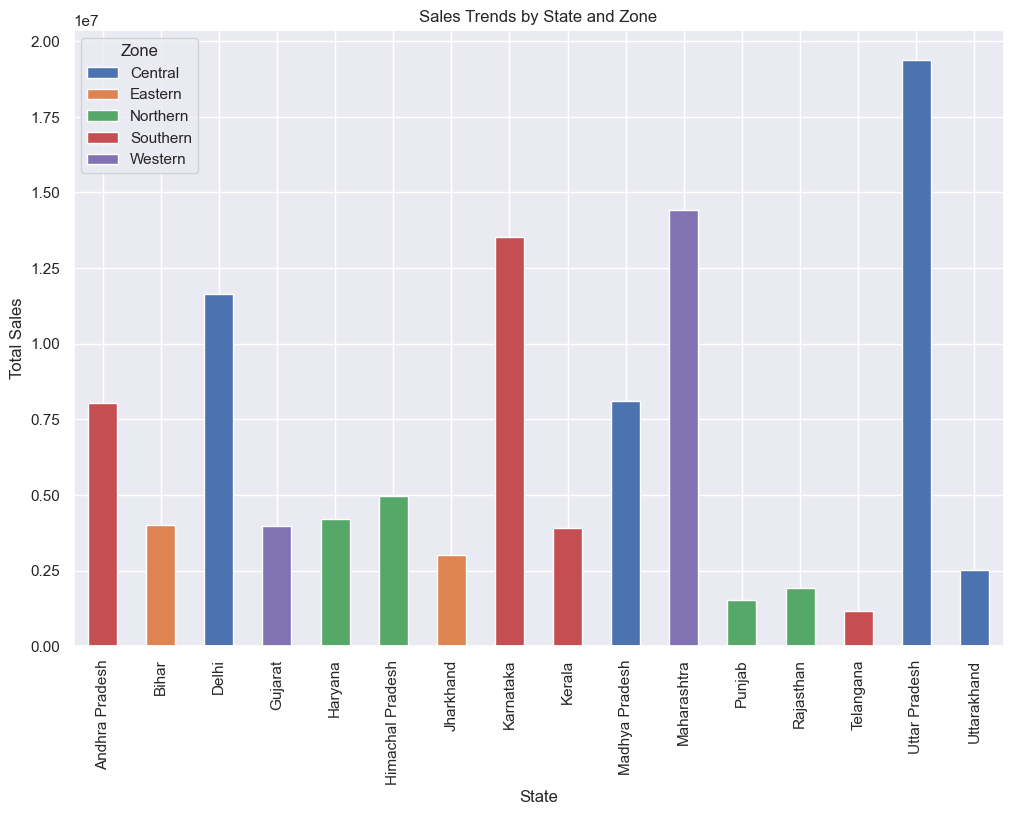

In [179]:
sales_trends.plot(kind='bar',figsize=(12,8),stacked=True)
plt.title('Sales Trends by State and Zone')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.legend(title='Zone')
plt.show()